<b>Predict the price of the Uber ride from a given pickup point to the agreed drop-off location. Perform the following tasks:</b><br>
- Pre-process the dataset
- Identify outliers
- Check the correlation
- Implement a linear regression model

Import required dependencies

In [1]:
import numpy as np
import pandas as pd

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For calculating distance from latitude and longitude data
!pip install geopy
import geopy.distance

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

  Using cached geopy-2.2.0-py3-none-any.whl (118 kB)
  Using cached geographiclib-1.52-py3-none-any.whl (38 kB)


In [2]:
df = pd.read_csv('uber.csv')
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


Drop the Unnamed column

In [3]:
df.drop(['Unnamed: 0','key'], axis=1, inplace=True)
display(df.head())

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


Check for Null values

In [4]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [5]:
df.dropna(inplace=True)
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

Reduce volume of dataset

In [6]:
df = df.iloc[:1000]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        1000 non-null   float64
 1   pickup_datetime    1000 non-null   object 
 2   pickup_longitude   1000 non-null   float64
 3   pickup_latitude    1000 non-null   float64
 4   dropoff_longitude  1000 non-null   float64
 5   dropoff_latitude   1000 non-null   float64
 6   passenger_count    1000 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 62.5+ KB


Scaling latitude and longitude to be in range for geopy

In [7]:
df = df[(df.pickup_latitude<90) & (df.dropoff_latitude<90) &
        (df.pickup_latitude>-90) & (df.dropoff_latitude>-90) &
        (df.pickup_longitude<180) & (df.dropoff_longitude<180) &
        (df.pickup_longitude>-180) & (df.dropoff_longitude>-180)]

In [8]:
df['Distance']=[round(geopy.distance.distance((df.pickup_latitude[i], df.pickup_longitude[i]),(df.dropoff_latitude[i], df.dropoff_longitude[i])).m,2) for i in df.index]
df.head(10)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1681.11
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2454.36
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5039.60
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1661.44
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4483.73
5,4.9,2011-02-12 02:27:09 UTC,-73.969019,40.755910,-73.969019,40.755910,1,0.00
6,24.5,2014-10-12 07:04:00 UTC,-73.961447,40.693965,-73.871195,40.774297,5,11734.67
7,2.5,2012-12-11 13:52:00 UTC,0.000000,0.000000,0.000000,0.000000,1,0.00
8,9.7,2012-02-17 09:32:00 UTC,-73.975187,40.745767,-74.002720,40.743537,1,2338.56
9,12.5,2012-03-29 19:06:00 UTC,-74.001065,40.741787,-73.963040,40.775012,1,4891.12


In [9]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['pickup_datetime'].head()

0   2015-05-07 19:52:06+00:00
1   2009-07-17 20:04:56+00:00
2   2009-08-24 21:45:00+00:00
3   2009-06-26 08:22:21+00:00
4   2014-08-28 17:47:00+00:00
Name: pickup_datetime, dtype: datetime64[ns, UTC]

In [ ]:
df['week_day'] = df['pickup_datetime'].dt.day_name()
df['Year'] = df['pickup_datetime'].dt.year
df['Month'] = df['pickup_datetime'].dt.month
df['Hour'] = df['pickup_datetime'].dt.hour
df = df.drop(['key', 'pickup_datetime'], axis=1, errors='ignore')
df.head()

In [13]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing in another column
df['week_day'] = labelencoder.fit_transform(df['week_day'])
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,week_day,Year,Month,Hour
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,1681.11,4,2015,5,19
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2454.36,0,2009,7,20
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,5039.60,1,2009,8,21
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,1661.44,0,2009,6,8
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,4483.73,4,2014,8,17


In [510]:
df.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'Distance',
       'week_day', 'Year', 'Month', 'Hour'],
      dtype='object')

Data Visualization

<AxesSubplot:xlabel='fare_amount', ylabel='Distance'>

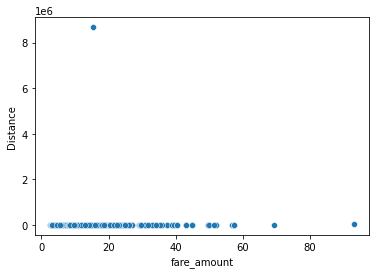

In [511]:
sns.scatterplot(data=df, x='fare_amount', y='Distance')

In [512]:
maxValues = df.max()
print(maxValues)

fare_amount          9.316000e+01
pickup_longitude     1.782000e-03
pickup_latitude      4.085056e+01
dropoff_longitude    8.750000e-04
dropoff_latitude     4.091196e+01
passenger_count      6.000000e+00
Distance             8.666724e+06
week_day             6.000000e+00
Year                 2.015000e+03
Month                1.200000e+01
Hour                 2.300000e+01
dtype: float64


Delete Outliers

In [513]:
df = df.drop(df[(df.Distance > 12500) | (df.fare_amount > 35)].index)

df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 952 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        952 non-null    float64
 1   pickup_longitude   952 non-null    float64
 2   pickup_latitude    952 non-null    float64
 3   dropoff_longitude  952 non-null    float64
 4   dropoff_latitude   952 non-null    float64
 5   passenger_count    952 non-null    int64  
 6   Distance           952 non-null    float64
 7   week_day           952 non-null    int32  
 8   Year               952 non-null    int64  
 9   Month              952 non-null    int64  
 10  Hour               952 non-null    int64  
dtypes: float64(6), int32(1), int64(4)
memory usage: 85.5 KB


fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
Distance             0
week_day             0
Year                 0
Month                0
Hour                 0
dtype: int64

<AxesSubplot:xlabel='fare_amount', ylabel='Distance'>

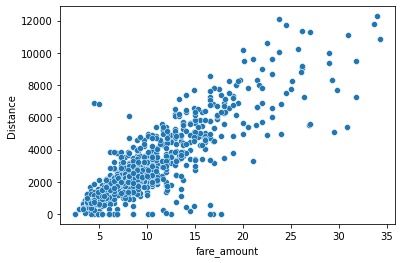

In [522]:
sns.scatterplot(data=df, x='fare_amount', y='Distance')

Linear Correlation can be observed. Splitting into training and testing sets

In [527]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

print(X, Y)

     fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
0            7.5        -73.999817        40.738354         -73.999512   
1            7.7        -73.994355        40.728225         -73.994710   
2           12.9        -74.005043        40.740770         -73.962565   
3            5.3        -73.976124        40.790844         -73.965316   
4           16.0        -73.925023        40.744085         -73.973082   
..           ...               ...              ...                ...   
995          5.7        -73.969720        40.757577         -73.953782   
996          8.1        -73.993784        40.757054         -73.980018   
997          8.5        -73.972338        40.765078         -73.954527   
998          5.5        -73.979054        40.784730         -73.982970   
999          9.7        -73.983675        40.729944         -73.992416   

     dropoff_latitude  passenger_count  Distance  week_day  Year  Month  
0           40.723217                

In [528]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

<b>LINEAR REGRESSION MODEL</b>

In [529]:
L = LinearRegression()
L.fit(X_train, Y_train)

LinearRegression()

In [530]:
Y_pred = L.predict(X_test)
r_2 = L.score(X_test, Y_test)
print(r_2)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
print(rmse)

0.014671050363611715
6.081388551989915


<b>RANDOM FOREST MODEL</b>

In [534]:
from sklearn.ensemble import RandomForestClassifier
# n-estimators is the number of trees

classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [538]:
Y_pred2 = classifier.predict(X_test)

R2 = classifier.score(X_test, Y_test)
RMSE = mean_squared_error(Y_test, Y_pred2, squared=False)
print(R2)
print(RMSE)

0.06282722513089005
8.573672107279434
